In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [160]:
df = pd.read_csv("../data/mega mega after save.csv")
df.head()

,student_id,avg_attempts,eoc_crct/poss,eoc_crct/atmp,n_possible,n_correct,n_attempt,n_na,avg_cost,avg_expectance,avg_intrinsic,avg_utility
0,988aaef5-55d8-4efd-a2aa-8a17e687965e,1.54,0.612,0.397,85,52,131,28,2.75,4.60,4.80,4.80
1,bb3d0834-83be-4158-8d8e-6230178074a8,1.29,0.265,0.206,98,26,126,29,4.25,4.20,4.20,4.20
2,c985759c-1ed2-4964-8c29-e17a0844e44a,2.17,0.696,0.321,115,80,249,36,4.00,4.33,4.67,4.67
3,0556b794-cd80-4af6-8cfa-8055462c215a,1.14,0.644,0.567,59,38,67,4,2.36,4.82,5.45,5.27
4,062f021e-8297-41e6-a8fe-54a382ab7404,1.62,0.662,0.408,74,49,120,4,5.27,2.36,2.91,3.64


In [161]:
km = KMeans(random_state=42)
# visualizer = KElbowVisualizer(km, k=(2,10))
# X = df.iloc[:,7:11].values
X = df.iloc[:,8:11].values
X

array([[2.75, 4.6 , 4.8 ],
       [4.25, 4.2 , 4.2 ],
       [4.  , 4.33, 4.67],
       [2.36, 4.82, 5.45],
       [5.27, 2.36, 2.91],
       [2.09, 5.09, 4.88],
       [1.09, 5.91, 5.91],
       [2.27, 4.36, 3.82],
       [2.5 , 3.9 , 4.7 ],
       [2.64, 4.91, 6.  ],
       [2.  , 4.73, 4.7 ],
       [2.45, 4.55, 4.9 ],
       [2.45, 2.  , 2.09],
       [2.67, 4.67, 3.33],
       [1.91, 5.36, 5.36],
       [2.8 , 4.5 , 3.3 ],
       [1.  , 5.91, 5.91],
       [3.45, 4.55, 4.2 ],
       [2.09, 4.73, 5.  ],
       [3.55, 3.45, 3.5 ],
       [2.7 , 5.  , 4.9 ],
       [2.64, 4.82, 5.18],
       [3.82, 4.27, 4.27],
       [2.  , 5.  , 4.33],
       [2.09, 4.82, 4.9 ],
       [2.45, 4.45, 5.  ],
       [1.82, 5.09, 6.  ],
       [1.73, 5.27, 5.18],
       [3.83, 4.08, 3.92],
       [3.73, 4.17, 4.17],
       [3.  , 4.83, 5.08],
       [2.08, 5.08, 4.45],
       [2.58, 4.75, 5.  ],
       [3.83, 4.33, 4.67],
       [3.83, 4.58, 4.83],
       [2.  , 5.  , 5.  ],
       [4.25, 2.5 , 3.25],
 

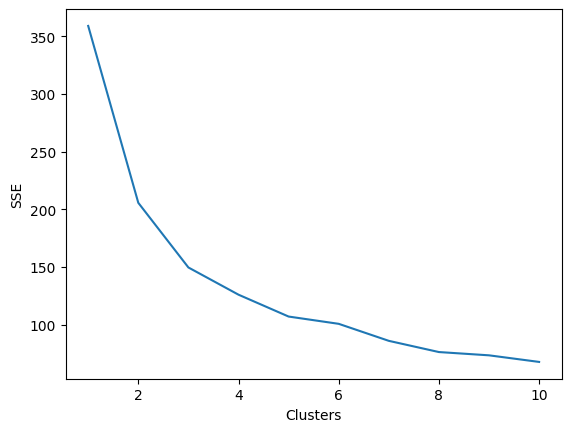

In [162]:
from sklearn.preprocessing import MinMaxScaler

wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

scaler = MinMaxScaler()

# scaler.fit(df[['avg_expectance']])
# df['avg_expectance'] = scaler.transform(df[['avg_expectance']])

# scaler.fit(df[['avg_cost']])
# df['avg_cost'] = scaler.transform(df[['avg_cost']])

# scaler.fit(df[['avg_intrinsic']])
# df['avg_intrinsic'] = scaler.transform(df[['avg_intrinsic']])

In [163]:
k_means_optimum = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(X)

df['cluster'] = y
df.head()

,student_id,avg_attempts,eoc_crct/poss,eoc_crct/atmp,n_possible,n_correct,n_attempt,n_na,avg_cost,avg_expectance,avg_intrinsic,avg_utility,cluster
0,988aaef5-55d8-4efd-a2aa-8a17e687965e,1.54,0.612,0.397,85,52,131,28,2.75,4.60,4.80,4.80,2
1,bb3d0834-83be-4158-8d8e-6230178074a8,1.29,0.265,0.206,98,26,126,29,4.25,4.20,4.20,4.20,0
2,c985759c-1ed2-4964-8c29-e17a0844e44a,2.17,0.696,0.321,115,80,249,36,4.00,4.33,4.67,4.67,0
3,0556b794-cd80-4af6-8cfa-8055462c215a,1.14,0.644,0.567,59,38,67,4,2.36,4.82,5.45,5.27,2
4,062f021e-8297-41e6-a8fe-54a382ab7404,1.62,0.662,0.408,74,49,120,4,5.27,2.36,2.91,3.64,1


In [164]:
data1 = df[df.cluster==0]
data2 = df[df.cluster==1]
data3 = df[df.cluster==2]

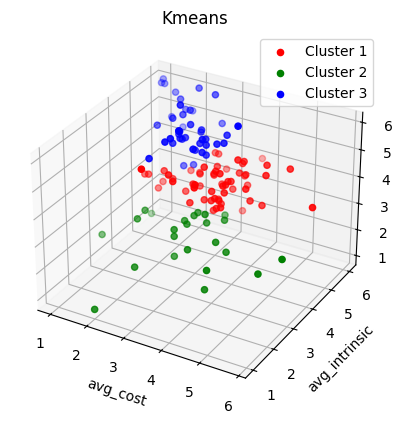

In [165]:

kplot = plt.axes(projection='3d')
xline = np.linspace(0, 1, 1000)
yline = np.linspace(0, 1, 1000)
zline = np.linspace(0, 1, 1000)
# kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.avg_cost, data1.avg_intrinsic, data1.avg_expectance, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.avg_cost, data2.avg_intrinsic, data2.avg_expectance,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.avg_cost, data3.avg_intrinsic, data3.avg_expectance,c ='blue', label = 'Cluster 3')
# plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'indigo', s = 200)

kplot.set_xlabel("avg_cost")
kplot.set_ylabel("avg_intrinsic")
kplot.set_zlabel("Z_lab")

plt.legend()
plt.title("Kmeans")
plt.show()

In [166]:
clust1 = []
clust2 = []
clust3 = []

student1 = set()
student2 = set()
student3 = set()


id_list = data1.iloc[:, 0].astype(str).tolist()

for id in id_list:
    student1.add(id)

id_list = data2.iloc[:, 0].astype(str).tolist()

for id in id_list:
    student2.add(id)

id_list = data3.iloc[:, 0].astype(str).tolist()

for id in id_list:
    student3.add(id)

for x in range(1,8):
    
    # student1.add(data1.iloc[:,0:1].values)

    clust1.append(np.average(data1.iloc[:,x:x+1].values))
    clust2.append(np.average(data2.iloc[:,x:x+1].values))
    clust3.append(np.average(data3.iloc[:,x:x+1].values))



In [167]:
media = pd.read_csv("../data/media_views.csv")
media.head()

,page,student_id,Total Video Watching
0,4.2 Explaining One Variable with Another,0556b794-cd80-4af6-8cfa-8055462c215a,1.668363
1,4.2 Explaining One Variable with Another,0f122889-830d-40c1-a6f8-f432cb327190,1.026435
2,4.2 Explaining One Variable with Another,3cc14c3e-8586-4017-80c1-152954ebbe2a,2.162621
3,4.2 Explaining One Variable with Another,41422302-20a7-417e-88ea-3b29631a418d,0.999778
4,4.2 Explaining One Variable with Another,4877fc0b-61be-404d-b1cf-bfa0e547feca,2.999594


In [168]:
vid1, vid2, vid3 = [], [], []
for index, row in media.iterrows():

    if(row["student_id"] in student1):

        vid1.append(row["Total Video Watching"])

    elif(row["student_id"] in student2):

        vid2.append(row["Total Video Watching"])

    elif(row["student_id"] in student3):

        vid3.append(row["Total Video Watching"])

clust1.append(np.average(vid1))
clust2.append(np.average(vid2))
clust3.append(np.average(vid3))



In [169]:
pages = pd.read_csv("../data/page_views4.csv")
pages.head()

,student_id,Average_time_engaged,num_reviewed,num_retry,Sum engaged
0,988aaef5-55d8-4efd-a2aa-8a17e687965e,182875.18,59,0,32734658
1,bb3d0834-83be-4158-8d8e-6230178074a8,150016.54,20,0,18602051
2,c985759c-1ed2-4964-8c29-e17a0844e44a,424955.62,87,16,94340148
3,0556b794-cd80-4af6-8cfa-8055462c215a,475811.40,128,239,165582368
4,062f021e-8297-41e6-a8fe-54a382ab7404,328154.09,130,69,105993772


In [170]:
cols = ["num_reviewed", "num_retry", "Sum engaged"]
for x in range(3):

    temp1, temp2, temp3 = [], [], []

    for index, row in pages.iterrows():
        
        if(row["student_id"] in student1):
            temp1.append(row[cols[x]])
        
        elif(row["student_id"] in student2):

            temp2.append(row[cols[x]])

        elif(row["student_id"] in student3):

            temp3.append(row[cols[x]])
    
    clust1.append(np.average(temp1))
    clust2.append(np.average(temp2))
    clust3.append(np.average(temp3))

clust1.insert(0, len(student1))
clust2.insert(0, len(student2))
clust3.insert(0, len(student3))


print(clust2)
print(clust1)
print(clust3)

[24, 1.61, 0.4639166666666667, 0.32308333333333333, 75.45833333333333, 35.333333333333336, 132.33333333333334, 21.541666666666668, 0.789838474625, 78.04166666666667, 2.9166666666666665, 77069268.54166667]
[61, 1.6316393442622954, 0.5531475409836066, 0.3886229508196722, 72.1311475409836, 40.31147540983606, 122.9672131147541, 15.229508196721312, 1.7471895189259259, 92.40983606557377, 21.901639344262296, 94567465.47540984]
[47, 1.3525531914893618, 0.6657659574468084, 0.5132340425531914, 68.76595744680851, 45.40425531914894, 95.06382978723404, 13.46808510638298, 1.0134623476923077, 173.5744680851064, 71.48936170212765, 113433216.29787233]
